## docs/guide/gaussianmf.md

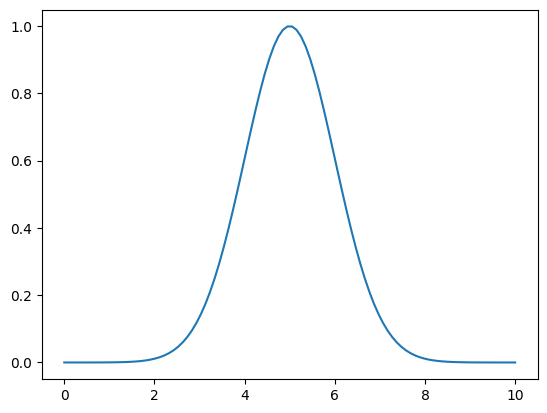

In [57]:
import numpy as np
from anfis_toolbox import GaussianMF
import matplotlib.pyplot as plt


# Generate a range of x values
x = np.linspace(0, 10, 100)

# Create a Gaussian membership function with a mean of 5 and a sigma of 2
gaussian = GaussianMF(5, 1)

# Calculate the membership values (y) for each x value
y = gaussian(x)

plt.plot(x, y)

plt.savefig("docs/assets/gaussian_mf.svg", format="svg")

plt.show()

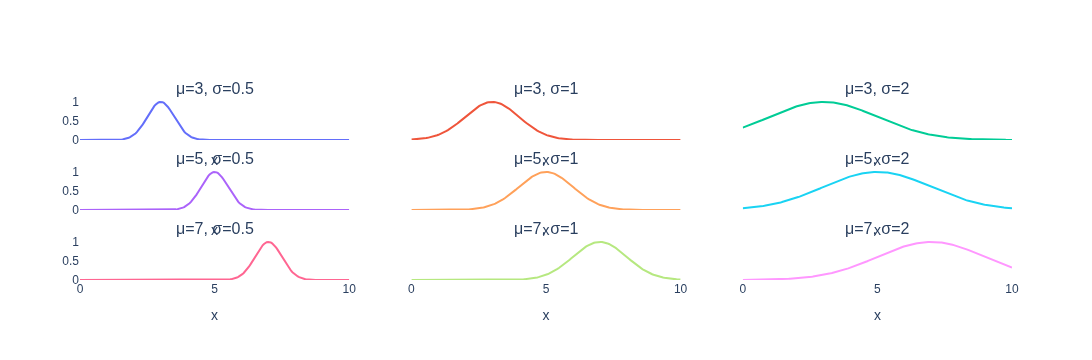

In [50]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

from anfis_toolbox import GaussianMF

# Geração dos dados para o eixo x
x = np.linspace(0, 10, 200)

# Valores de média e desvio padrão para os subplots
mus = [3, 5, 7]
sigmas = [0.5, 1, 2]

# Cria um array com os títulos de cada subplot
subplot_titles = [f"μ={mu}, σ={sigma}" for mu in mus for sigma in sigmas]

# Cria a grade de subplots 3x3
fig = make_subplots(rows=len(mus), cols=len(sigmas), subplot_titles=subplot_titles)

# Adiciona um traço para cada combinação de mu e sigma
for i, mu in enumerate(mus):
    for j, sigma in enumerate(sigmas):
        # Gera os dados para a curva atual
        gaussian = GaussianMF(mu, sigma)
        y = gaussian(x)
        
        # Adiciona o traço no subplot correto (índices de linha e coluna começam em 1)
        fig.add_trace(
            go.Scatter(x=x, y=y, mode='lines', name=f'μ={mu}, σ={sigma}'),
            row=i + 1, col=j + 1
        )

# Atualiza o layout do gráfico com fundo transparente
fig.update_layout(
    showlegend=False,
    #paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

# Atualiza os eixos de cada subplot para ter uma escala e rótulos consistentes
for i in range(len(mus)):
    for j in range(len(sigmas)):
        # Atualiza o eixo Y
        fig.update_yaxes(
            range=[0, 1.05],
            showticklabels=(j == 0),  # Mostra rótulos apenas na primeira coluna
            row=i + 1, col=j + 1
        )
        
        # Atualiza o eixo X
        fig.update_xaxes(
            title_text='x',
            showticklabels=(i == len(mus) - 1),  # Mostra rótulos apenas na última linha
            row=i + 1, col=j + 1
        )
        
        
# Mostra o gráfico (ideal para Jupyter Notebooks)
fig.show()

pio.write_html(fig, file="docs/assets/gaussian_mf_subplots.html")